In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import calmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [6]:
df = pd.read_csv('source/fires_for_python2018_2020.csv', parse_dates = ['date'])
df.head()

,id,date,numOfFires
0,1,2018-01-01,0
1,2,2018-01-02,0
2,3,2018-01-03,0
3,4,2018-01-04,0
4,5,2018-01-05,0


In [8]:
df = df.drop(['id'], axis = 1)
df.head()

,date,numOfFires
0,2018-01-01,0
1,2018-01-02,0
2,2018-01-03,0
3,2018-01-04,0
4,2018-01-05,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1096 non-null   datetime64[ns]
 1   numOfFires  1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB


In [13]:
print(df.date.min())
print(df.date.max())

2018-01-01 00:00:00
2020-12-31 00:00:00


In [32]:
df['year'] = df.date.dt.year
df.set_index('date', inplace = True)
df.head()

,numOfFires,year
date,,
2018-01-01,0,2018
2018-01-02,0,2018
2018-01-03,0,2018
2018-01-04,0,2018
2018-01-05,0,2018


In [33]:
df18 = df.query('year == 2018')
df19 = df.query('year == 2019')
df20 = df.query('year == 2020')
df20.head()

,numOfFires,year
date,,
2020-01-01,0,2020
2020-01-02,0,2020
2020-01-03,0,2020
2020-01-04,0,2020
2020-01-05,0,2020


In [125]:
df19.numOfFires.max()


8

<ipython-input-79-133eadf3e016>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  calmap.calendarplot(df18['2018']['numOfFires'], cmap = 'magma_r'
<ipython-input-79-133eadf3e016>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  calmap.calendarplot(df19['2019']['numOfFires'], cmap = 'magma_r'
<ipython-input-79-133eadf3e016>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fig, ax = calmap.calendarplot(df20['2020']['numOfFires'], cmap = 'magma_r'


<Figure size 32480x28000 with 0 Axes>

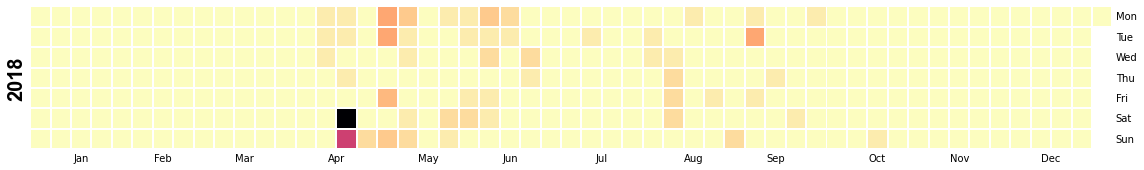

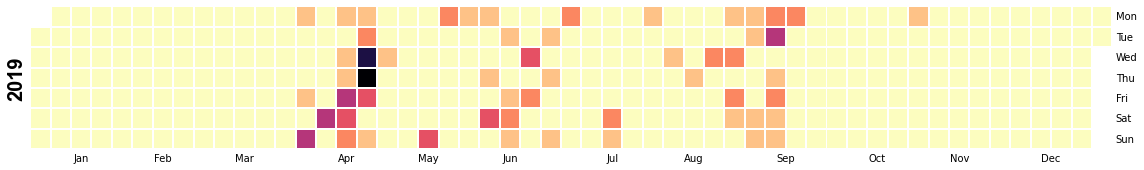

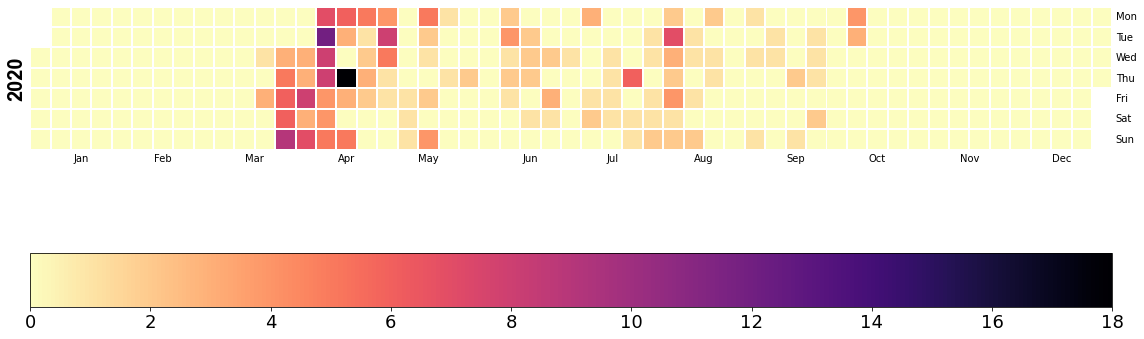

In [79]:
plt.figure(figsize = (116, 100), dpi = 280)

calmap.calendarplot(df18['2018']['numOfFires'], cmap = 'magma_r'
                   , fig_kws={'figsize': (16,10)} 
                   , yearlabel_kws = {'color':'black', 'fontsize':20})
calmap.calendarplot(df19['2019']['numOfFires'], cmap = 'magma_r'
                   , fig_kws={'figsize': (16,10)} 
                   , yearlabel_kws = {'color':'black', 'fontsize':20})
fig, ax = calmap.calendarplot(df20['2020']['numOfFires'], cmap = 'magma_r'
                   , fig_kws={'figsize': (16,10)} 
                   , yearlabel_kws = {'color':'black', 'fontsize':20})

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='horizontal').ax.tick_params(labelsize = 18)
plt.show()

In [121]:
def get_plot(df, k):
    plt.figure(figsize = (16, 10), dpi = 300)
    fig, ax = calmap.calendarplot(df, cmap = 'magma_r'
                   , fig_kws={'figsize': (16,10)} 
                   , yearlabel_kws = {'color':'black', 'fontsize':20})
    n = [num*3 for num in range(k)]
    fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist()
                 , orientation='vertical'
                 , shrink = 0.18).set_ticks(n).tick_params(labelsize = 12)
    return plt.show()



<ipython-input-122-f6167903dc89>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  get_plot(df18['2018']['numOfFires'], df18.numOfFires.max())


AttributeError: 'NoneType' object has no attribute 'tick_params'

<Figure size 4800x3000 with 0 Axes>

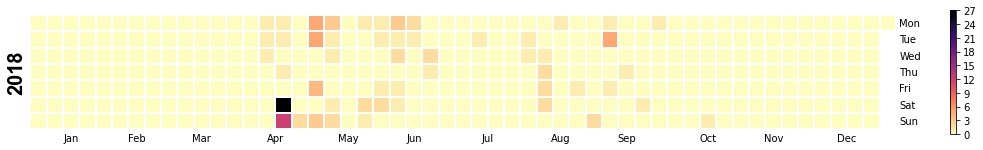

In [122]:
 get_plot(df18['2018']['numOfFires'], df18.numOfFires.max())

<ipython-input-123-79ed5aa3741b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  get_plot(df19['2019']['numOfFires'], df19.numOfFires.max())


AttributeError: 'NoneType' object has no attribute 'tick_params'

<Figure size 4800x3000 with 0 Axes>

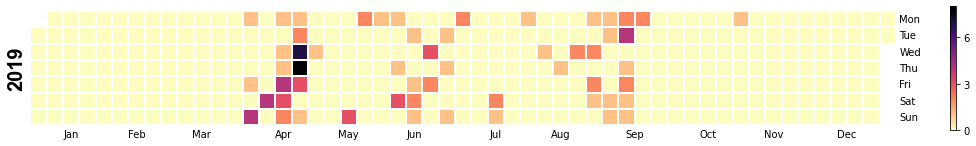

In [123]:
get_plot(df19['2019']['numOfFires'], df19.numOfFires.max())

<ipython-input-124-b6b644cda541>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  get_plot(df20['2020']['numOfFires'], df20.numOfFires.max())


AttributeError: 'NoneType' object has no attribute 'tick_params'

<Figure size 4800x3000 with 0 Axes>

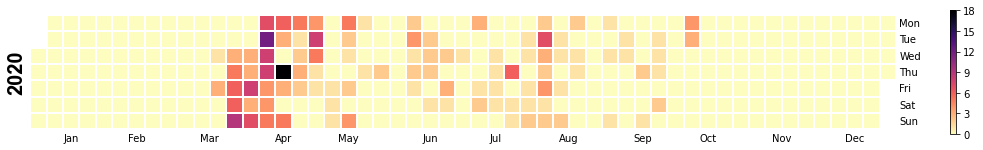

In [124]:
get_plot(df20['2020']['numOfFires'], df20.numOfFires.max())

<ipython-input-129-55ec4c97ad15>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fig, ax = calmap.calendarplot(df19['2019']['numOfFires'], cmap = 'magma_r'


AttributeError: 'NoneType' object has no attribute 'tick_params'

<Figure size 4800x3000 with 0 Axes>

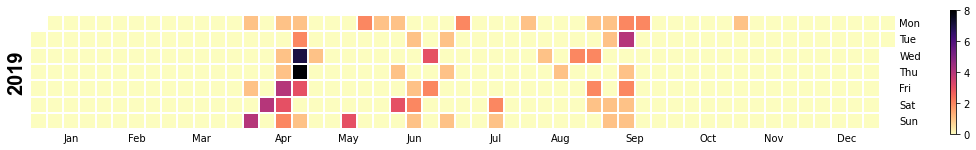

In [129]:
plt.figure(figsize = (16, 10), dpi = 300)
fig, ax = calmap.calendarplot(df19['2019']['numOfFires'], cmap = 'magma_r'
                   , fig_kws={'figsize': (16,10)} 
                   , yearlabel_kws = {'color':'black', 'fontsize':20})
n = [num*2 for num in range(df19.numOfFires.max())]
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist()
                 , orientation='vertical'
                 , shrink = 0.18).set_ticks(n).tick_params(labelsize = 12)
plt.show()